In [1]:
%pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import random
from datetime import timedelta, datetime

In [4]:
# Generate random sample data for customer service tickets
np.random.seed(42)

# Sample agents
agents = ['Alice', 'Bob', 'Charlie', 'David', 'Eve']

In [5]:
# Sample data for tickets
n_tickets = 1000
data = {
    'Ticket_ID': [f'TCKT{i}' for i in range(1, n_tickets + 1)],
    'Open_Time': [datetime(2024, 9, 1) + timedelta(days=np.random.randint(0, 60)) for _ in range(n_tickets)],
    'First_Response_Time': [datetime(2024, 9, 1) + timedelta(days=np.random.randint(0, 60), hours=np.random.randint(1, 24)) for _ in range(n_tickets)],
    'Close_Time': [datetime(2024, 9, 1) + timedelta(days=np.random.randint(1, 60), hours=np.random.randint(1, 24)) for _ in range(n_tickets)],
    'Agent': [random.choice(agents) for _ in range(n_tickets)],
    'CSAT': [np.random.randint(1, 6) for _ in range(n_tickets)],  # Customer Satisfaction Score (1-5)
    'NPS': [np.random.randint(1, 11) for _ in range(n_tickets)],  # Net Promoter Score (1-10)
    'Escalated': [random.choice([0, 1]) for _ in range(n_tickets)],  # Escalation flag
    'Resolved_On_First_Contact': [random.choice([0, 1]) for _ in range(n_tickets)],  # FCR flag
}

df = pd.DataFrame(data)

In [6]:
# Calculate response and handling times
df['Response_Time'] = (df['First_Response_Time'] - df['Open_Time']).dt.total_seconds() / 3600  # Hours
df['Handling_Time'] = (df['Close_Time'] - df['Open_Time']).dt.total_seconds() / 3600  # Hours

# Convert CSAT and NPS to meaningful categories for analysis
df['CSAT_Category'] = pd.cut(df['CSAT'], bins=[0, 2, 3, 4, 5], labels=['Poor', 'Fair', 'Good', 'Excellent'])
df['NPS_Category'] = pd.cut(df['NPS'], bins=[0, 6, 8, 10], labels=['Detractors', 'Passives', 'Promoters'])

df.head()

,Ticket_ID,Open_Time,First_Response_Time,Close_Time,Agent,CSAT,NPS,Escalated,Resolved_On_First_Contact,Response_Time,Handling_Time,CSAT_Category,NPS_Category
0,TCKT1,2024-10-09,2024-10-04 08:00:00,2024-09-22 20:00:00,Alice,4,8,0,1,-112.0,-388.0,Good,Passives
1,TCKT2,2024-10-22,2024-10-09 02:00:00,2024-10-26 21:00:00,Charlie,4,1,1,0,-310.0,117.0,Good,Detractors
2,TCKT3,2024-09-29,2024-10-24 22:00:00,2024-09-27 04:00:00,Alice,2,1,1,1,622.0,-44.0,Poor,Detractors
3,TCKT4,2024-09-15,2024-09-03 18:00:00,2024-10-05 20:00:00,David,3,6,0,0,-270.0,500.0,Fair,Detractors
4,TCKT5,2024-10-13,2024-09-12 01:00:00,2024-10-19 18:00:00,Eve,1,10,1,1,-743.0,162.0,Poor,Promoters


In [39]:
# Save DataFrame to a CSV file
df.to_csv('KPIs.csv', index=False)

# KPI Calculations:

In [7]:
# 1. Average Response Time (in hours)
avg_response_time = df['Response_Time'].mean()

# 2. First Contact Resolution (FCR) Rate
fcr_rate = df['Resolved_On_First_Contact'].mean() * 100  # Convert to percentage

# 3. Average CSAT (Customer Satisfaction Score)
avg_csat = df['CSAT'].mean()

# 4. Net Promoter Score (NPS)
nps_score = (df['NPS_Category'].value_counts(normalize=True) * 100).reindex(['Promoters', 'Passives', 'Detractors'], fill_value=0)
nps_final = nps_score['Promoters'] - nps_score['Detractors']

# 5. Average Handling Time
avg_handling_time = df['Handling_Time'].mean()

# 6. Ticket Volume
ticket_volume = df['Ticket_ID'].count()

# 7. Escalation Rate
escalation_rate = df['Escalated'].mean() * 100

# 8. Agent Utilization (number of tickets per agent)
agent_utilization = df['Agent'].value_counts()

# Print KPI summary
print(f"Average Response Time: {avg_response_time:.2f} hours")
print(f"First Contact Resolution (FCR) Rate: {fcr_rate:.2f}%")
print(f"Average CSAT: {avg_csat:.2f}")
print(f"NPS Score: {nps_final:.2f}")
print(f"Average Handling Time: {avg_handling_time:.2f} hours")
print(f"Ticket Volume: {ticket_volume}")
print(f"Escalation Rate: {escalation_rate:.2f}%")
print("Agent Utilization:")
print(agent_utilization)


Average Response Time: -15.10 hours
First Contact Resolution (FCR) Rate: 52.90%
Average CSAT: 3.00
NPS Score: -38.10
Average Handling Time: 21.00 hours
Ticket Volume: 1000
Escalation Rate: 49.30%
Agent Utilization:
Agent
Alice      212
Charlie    208
Eve        208
Bob        196
David      176
Name: count, dtype: int64


# Data Visualization Using Matplotlib:

## 1. KPI Visualization (Bar Plot for CSAT Categories):

<ipython-input-11-252f8e100e47>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=csat_counts.index, y=csat_counts.values, palette="Blues_d")


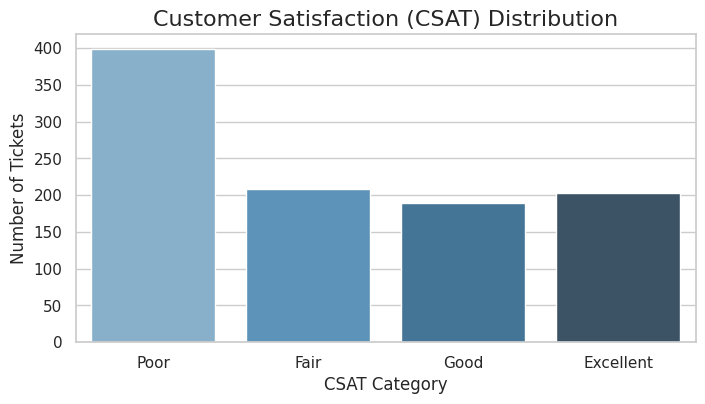

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# CSAT Bar Plot
plt.figure(figsize=(8, 4))
csat_counts = df['CSAT_Category'].value_counts()
sns.barplot(x=csat_counts.index, y=csat_counts.values, palette="Blues_d")
plt.title('Customer Satisfaction (CSAT) Distribution', fontsize=16)
plt.xlabel('CSAT Category', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.show()

## 2. Agent Utilization (Pie Chart):

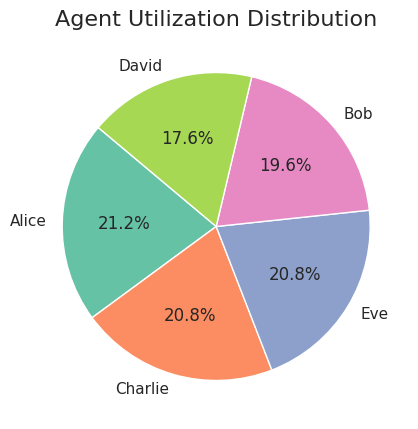

In [14]:
# Agent Utilization Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(agent_utilization, labels=agent_utilization.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Agent Utilization Distribution', fontsize=16)
plt.show()

## 3. Handling Time Distribution (Histogram):

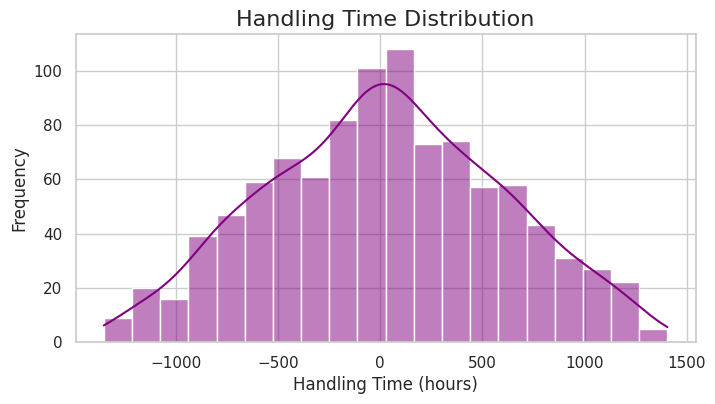

In [16]:
# Handling Time Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['Handling_Time'], bins=20, kde=True, color='purple')
plt.title('Handling Time Distribution', fontsize=16)
plt.xlabel('Handling Time (hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

## 4. Correlation Heatmap:
This visualizes the correlation between different numerical variables (like Response Time, Handling Time, NPS, etc.) to identify relationships.

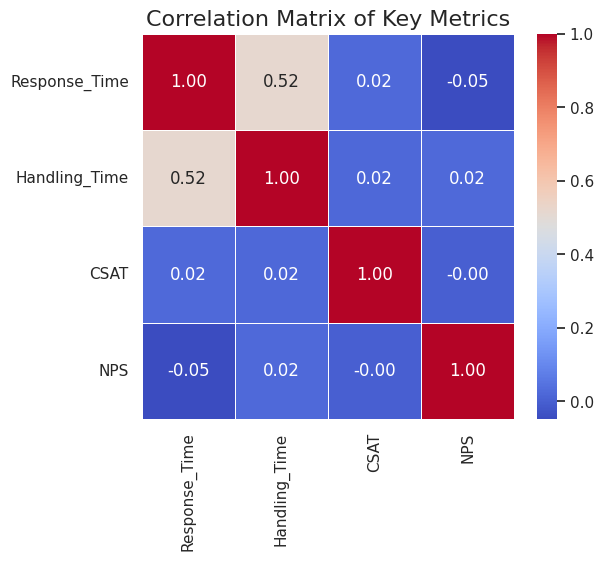

In [20]:
# Correlation Heatmap
plt.figure(figsize=(6, 5))
corr_matrix = df[['Response_Time', 'Handling_Time', 'CSAT', 'NPS']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='white', fmt='.2f')
plt.title('Correlation Matrix of Key Metrics', fontsize=16)
plt.show()

## 5. Line Plot for Average Response and Handling Times Over Time:
This visual shows how the average response and handling times trend over time.

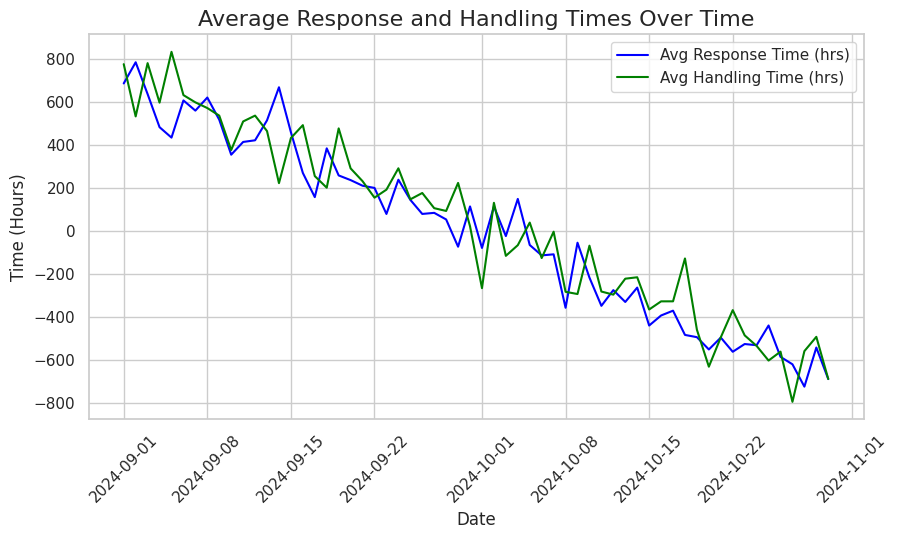

In [22]:
# Grouping data by day to calculate average response and handling times
df['Open_Date'] = df['Open_Time'].dt.date
avg_times = df.groupby('Open_Date')[['Response_Time', 'Handling_Time']].mean().reset_index()

# Line Plot for Response and Handling Times
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_times, x='Open_Date', y='Response_Time', label='Avg Response Time (hrs)', color='blue')
sns.lineplot(data=avg_times, x='Open_Date', y='Handling_Time', label='Avg Handling Time (hrs)', color='green')
plt.title('Average Response and Handling Times Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Time (Hours)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

## 6. Box Plot for Response Time Distribution:
Box plots give a clear indication of the spread and outliers in the response times.

<ipython-input-25-d7a232fe8894>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Response_Time', palette='Set3')


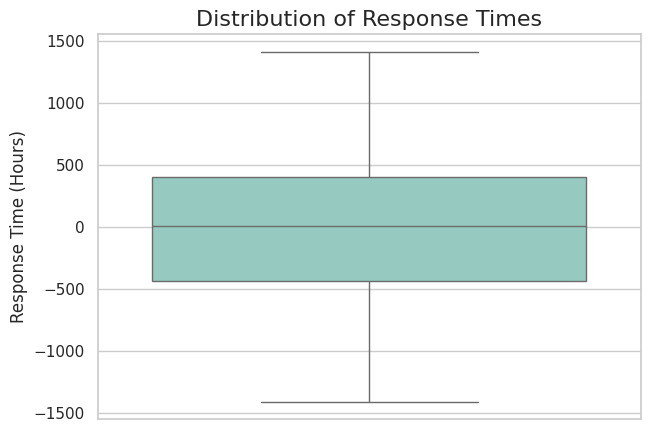

In [25]:
# Box Plot for Response Times
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, y='Response_Time', palette='Set3')
plt.title('Distribution of Response Times', fontsize=16)
plt.ylabel('Response Time (Hours)', fontsize=12)
plt.show()

## 7. Stacked Bar Chart for CSAT and NPS Distribution:
A stacked bar chart helps to visualize the distribution of CSAT and NPS categories together.

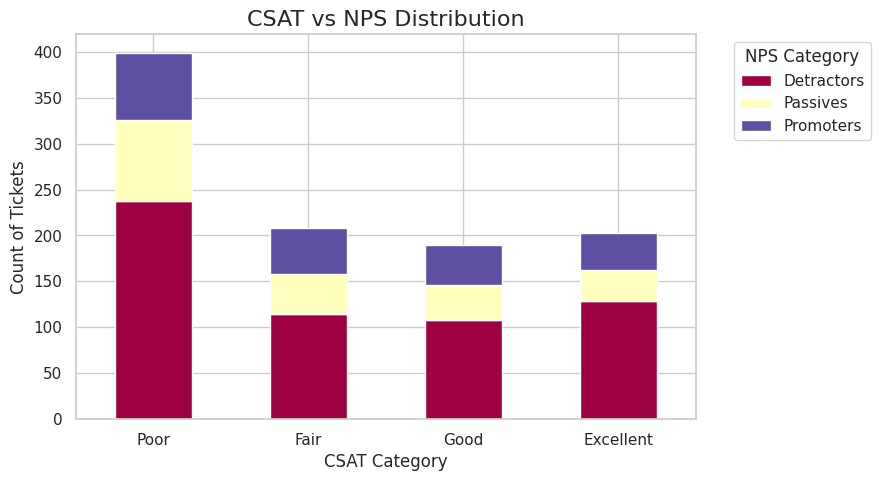

In [27]:
# Stacked Bar Chart for CSAT and NPS Distribution
csat_nps_counts = pd.crosstab(df['CSAT_Category'], df['NPS_Category'])

csat_nps_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Spectral')
plt.title('CSAT vs NPS Distribution', fontsize=16)
plt.xlabel('CSAT Category', fontsize=12)
plt.ylabel('Count of Tickets', fontsize=12)
plt.legend(title='NPS Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

## 8. Bar Plot with Agent Ticket Volume & Annotations:
This chart visualizes the ticket volume for each agent, along with annotations to make it more informative.

<ipython-input-29-fba3149c3ed7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=agent_utilization.index, y=agent_utilization.values, palette='viridis')


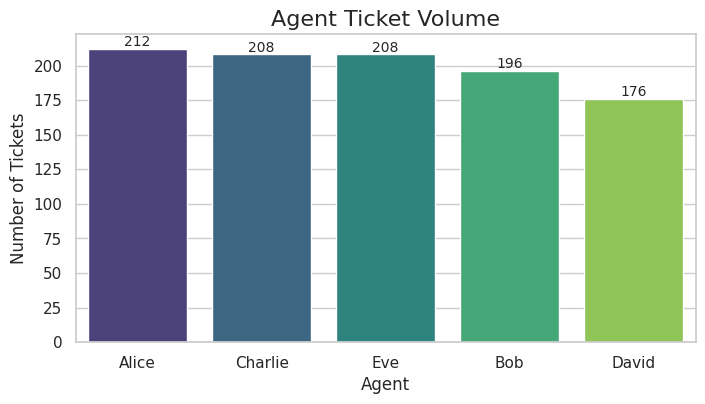

In [29]:
# Agent Ticket Volume Bar Plot with Annotations
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=agent_utilization.index, y=agent_utilization.values, palette='viridis')
plt.title('Agent Ticket Volume', fontsize=16)
plt.xlabel('Agent', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)

# Add annotations
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.show()

## 9. Scatter Plot for Handling Time vs CSAT:
This scatter plot helps show the relationship between handling time and CSAT to understand whether longer handling times impact customer satisfaction.

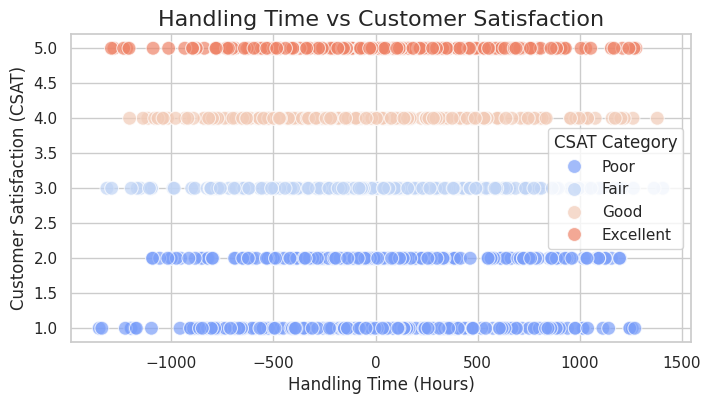

In [30]:
# Scatter Plot for Handling Time vs CSAT
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Handling_Time', y='CSAT', hue='CSAT_Category', palette='coolwarm', s=100, alpha=0.7)
plt.title('Handling Time vs Customer Satisfaction', fontsize=16)
plt.xlabel('Handling Time (Hours)', fontsize=12)
plt.ylabel('Customer Satisfaction (CSAT)', fontsize=12)
plt.legend(title='CSAT Category')
plt.show()


## 10. Pie Chart for Escalation Rate:
Visualizing the escalation rate can help show how many tickets are escalated versus resolved at the first level.

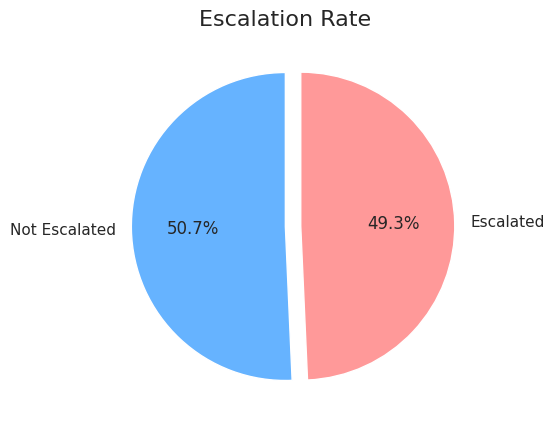

In [32]:
# Pie Chart for Escalation Rate
escalation_data = df['Escalated'].value_counts()
labels = ['Not Escalated', 'Escalated']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(5,5))
plt.pie(escalation_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0, 0.1])
plt.title('Escalation Rate', fontsize=16)
plt.show()

## 11. Violin Plot for Handling Time Distribution:
A violin plot is an excellent way to visualize the distribution of handling times with more detail than a box plot.

<ipython-input-34-99859524ed00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Agent', y='Handling_Time', palette='Set2')


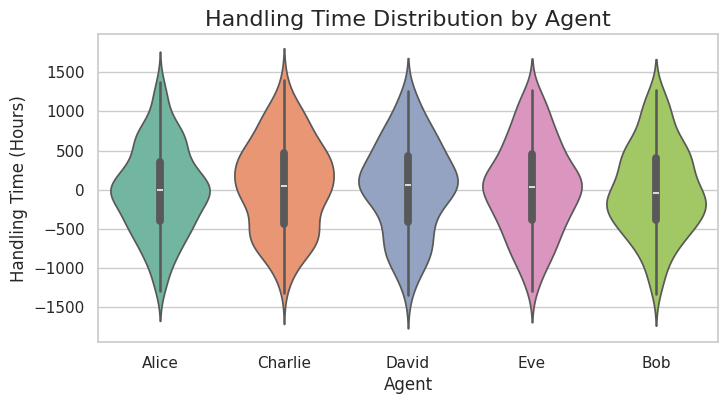

In [34]:
# Violin Plot for Handling Time
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='Agent', y='Handling_Time', palette='Set2')
plt.title('Handling Time Distribution by Agent', fontsize=16)
plt.xlabel('Agent', fontsize=12)
plt.ylabel('Handling Time (Hours)', fontsize=12)
plt.show()

## 12. Bar Chart for NPS Distribution:
This will give insight into how your NPS is distributed across different categories like Promoters, Passives, and Detractors.

<ipython-input-35-a67d61b11d38>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nps_counts.index, y=nps_counts.values, palette='coolwarm')


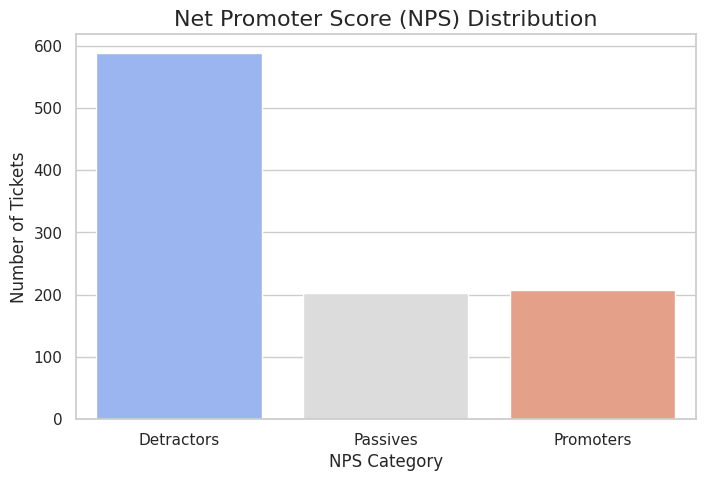

In [35]:
# Bar Plot for NPS Distribution
plt.figure(figsize=(8, 5))
nps_counts = df['NPS_Category'].value_counts().sort_index()
sns.barplot(x=nps_counts.index, y=nps_counts.values, palette='coolwarm')
plt.title('Net Promoter Score (NPS) Distribution', fontsize=16)
plt.xlabel('NPS Category', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.show()

## 13. Time Series Analysis (Rolling Average for Response Time):
A rolling average can help smooth the trends over time, making it easier to spot overall trends rather than daily fluctuations.

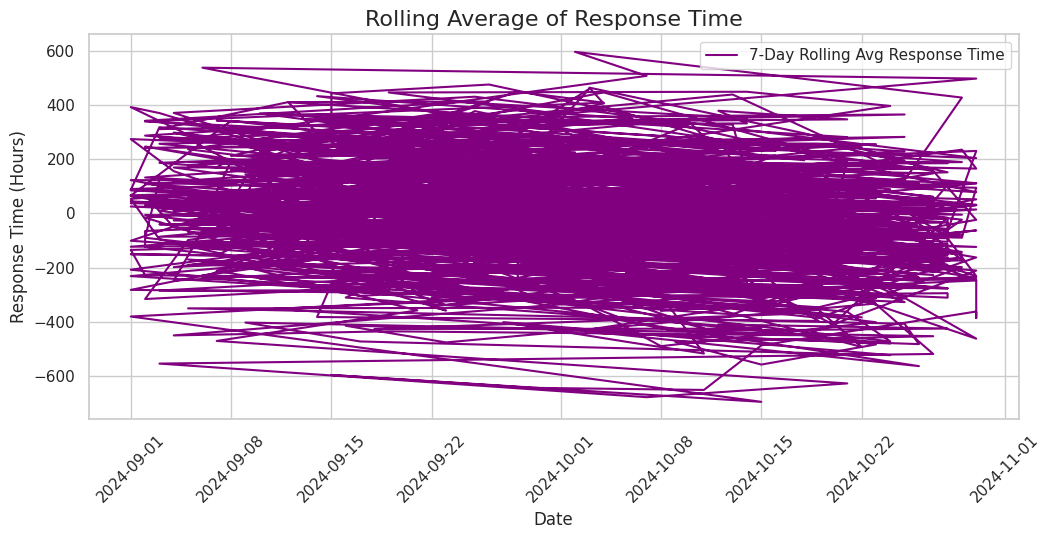

In [38]:
# Time Series Rolling Average for Response Time
df['Open_Date'] = pd.to_datetime(df['Open_Time']).dt.date
df.set_index('Open_Date', inplace=True)

rolling_avg = df['Response_Time'].rolling(window=7).mean()

plt.figure(figsize=(12, 5))
plt.plot(rolling_avg, label='7-Day Rolling Avg Response Time', color='purple')
plt.title('Rolling Average of Response Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Response Time (Hours)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

# Machine Learning

## Data Preparation

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [43]:
df.columns

Index(['Ticket_ID', 'Open_Time', 'First_Response_Time', 'Close_Time', 'Agent',
       'CSAT', 'NPS', 'Escalated', 'Resolved_On_First_Contact',
       'Response_Time', 'Handling_Time', 'CSAT_Category', 'NPS_Category'],
      dtype='object')

In [48]:
# Convert Open_Time to datetime
df['Open_Time'] = pd.to_datetime(df['Open_Time'])

In [49]:
df.head()

,Ticket_ID,Open_Time,First_Response_Time,Close_Time,Agent,CSAT,NPS,Escalated,Resolved_On_First_Contact,Response_Time,Handling_Time,CSAT_Category,NPS_Category,Day,Month,Year,Day_of_Week
Open_Date,,,,,,,,,,,,,,,,,
2024-10-09,TCKT1,2024-10-09,2024-10-04 08:00:00,2024-09-22 20:00:00,Alice,4,8,0,1,-112.0,-388.0,Good,Passives,9,10,2024,2
2024-10-22,TCKT2,2024-10-22,2024-10-09 02:00:00,2024-10-26 21:00:00,Charlie,4,1,1,0,-310.0,117.0,Good,Detractors,22,10,2024,1
2024-09-29,TCKT3,2024-09-29,2024-10-24 22:00:00,2024-09-27 04:00:00,Alice,2,1,1,1,622.0,-44.0,Poor,Detractors,29,9,2024,6
2024-09-15,TCKT4,2024-09-15,2024-09-03 18:00:00,2024-10-05 20:00:00,David,3,6,0,0,-270.0,500.0,Fair,Detractors,15,9,2024,6
2024-10-13,TCKT5,2024-10-13,2024-09-12 01:00:00,2024-10-19 18:00:00,Eve,1,10,1,1,-743.0,162.0,Poor,Promoters,13,10,2024,6


## Data Preparation

In [50]:
# Group by Open_Time and count tickets
ticket_counts = df.groupby('Open_Time').size().reset_index(name='Ticket_Volume')

# Extract features
ticket_counts['Day'] = ticket_counts['Open_Time'].dt.day
ticket_counts['Month'] = ticket_counts['Open_Time'].dt.month
ticket_counts['Year'] = ticket_counts['Open_Time'].dt.year
ticket_counts['Day_of_Week'] = ticket_counts['Open_Time'].dt.dayofweek

# Features and target variable
features = ticket_counts[['Day', 'Month', 'Year', 'Day_of_Week']]
target = ticket_counts['Ticket_Volume']

##  Split Data for Training and Testing

In [51]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


## Train a Machine Learning Model

In [52]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Evaluate the Model

Mean Squared Error: 24.65
R-squared: 0.07


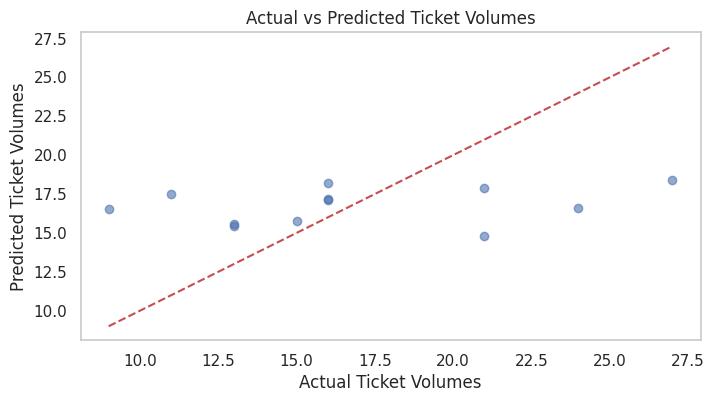

In [55]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize predictions vs actual
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.6)
# Replace y.min() and y.max() with y_test.min() and y_test.max()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Actual vs Predicted Ticket Volumes')
plt.xlabel('Actual Ticket Volumes')
plt.ylabel('Predicted Ticket Volumes')
plt.grid()
plt.show()


## Predict Future Ticket Volumes
Prepare Future Data: Create a DataFrame for the next month to predict ticket volumes.

In [56]:
# Create future dates for the next month
future_dates = pd.date_range(start=df['Open_Time'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame({'Open_Time': future_dates})
future_df['Day'] = future_df['Open_Time'].dt.day
future_df['Month'] = future_df['Open_Time'].dt.month
future_df['Year'] = future_df['Open_Time'].dt.year
future_df['Day_of_Week'] = future_df['Open_Time'].dt.dayofweek

# Predict future ticket volumes
future_features = future_df[['Day', 'Month', 'Year', 'Day_of_Week']]
future_predictions = model.predict(future_features)
future_df['Predicted_Ticket_Volume'] = future_predictions


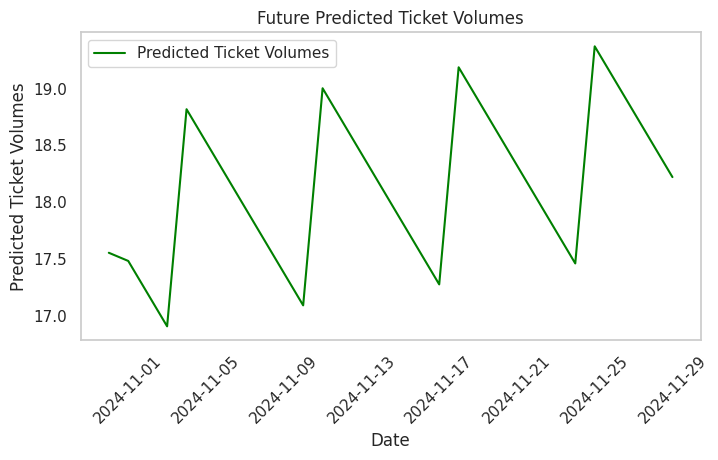

In [58]:
plt.figure(figsize=(8, 4))
plt.plot(future_df['Open_Time'], future_df['Predicted_Ticket_Volume'], label='Predicted Ticket Volumes', color='green')
plt.title('Future Predicted Ticket Volumes')
plt.xlabel('Date')
plt.ylabel('Predicted Ticket Volumes')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()